In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

In [6]:
w1=1;w2=1
b=1
x1=2;x2=3
alpha = 0.01

In [9]:
y_pred =8+4*w1
print('y_pred=', y_pred)

y_pred= 12


In [12]:
for i in range(20):
    dw1 = 24+32*w1
    w1=w1-alpha*dw1
    y_pred = 8+4*w1
    L=(y_pred-5)**2
    print("i:", i, "L=", round(L,2),
         "y_pred=", round(y_pred,2),
         "w1=", round(w1,2), "dw1=", round(dw1,2))

i: 0 L= 0.0 y_pred= 5.0 w1= -0.75 dw1= 0.0
i: 1 L= 0.0 y_pred= 5.0 w1= -0.75 dw1= 0.0
i: 2 L= 0.0 y_pred= 5.0 w1= -0.75 dw1= 0.0
i: 3 L= 0.0 y_pred= 5.0 w1= -0.75 dw1= 0.0
i: 4 L= 0.0 y_pred= 5.0 w1= -0.75 dw1= 0.0
i: 5 L= 0.0 y_pred= 5.0 w1= -0.75 dw1= 0.0
i: 6 L= 0.0 y_pred= 5.0 w1= -0.75 dw1= 0.0
i: 7 L= 0.0 y_pred= 5.0 w1= -0.75 dw1= 0.0
i: 8 L= 0.0 y_pred= 5.0 w1= -0.75 dw1= 0.0
i: 9 L= 0.0 y_pred= 5.0 w1= -0.75 dw1= 0.0
i: 10 L= 0.0 y_pred= 5.0 w1= -0.75 dw1= 0.0
i: 11 L= 0.0 y_pred= 5.0 w1= -0.75 dw1= 0.0
i: 12 L= 0.0 y_pred= 5.0 w1= -0.75 dw1= 0.0
i: 13 L= 0.0 y_pred= 5.0 w1= -0.75 dw1= 0.0
i: 14 L= 0.0 y_pred= 5.0 w1= -0.75 dw1= 0.0
i: 15 L= 0.0 y_pred= 5.0 w1= -0.75 dw1= 0.0
i: 16 L= 0.0 y_pred= 5.0 w1= -0.75 dw1= 0.0
i: 17 L= 0.0 y_pred= 5.0 w1= -0.75 dw1= 0.0
i: 18 L= 0.0 y_pred= 5.0 w1= -0.75 dw1= 0.0
i: 19 L= 0.0 y_pred= 5.0 w1= -0.75 dw1= 0.0


In [13]:
%matplotlib inline

In [14]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [37]:
def nn(X,y,m,alpha,num_of_iterations):
    fig,(ax1,ax2)= plt.subplots(1,2)  
    fig.set_size_inches(18,7)
    ax2.plot(X[0,:],X[1,:],'go')
    b=0
    w=np.random.randn(1,X.shape[0])*0.01
    for iteration in range(num_of_iterations):
        J=0; dw1=0;dw2=0;db=0;
        for i in range(m):
            z=np.dot(w,X[:,i])+b
            a = sigmoid(z)
            J+=-(y[0,i]*np.log(a)+(1-y[0,i])*np.log(1-a))
            dz=a-y[0,i]
            dw1+=dz*X[0,i]
            dw2+=dz*X[1,i]
            db=db+dz
        J=J/m
        dw1=dw1/m
        dw2=dw2/m
        db=db/m
        w[0,0]=w[0,0]-alpha*dw1
        w[0,1]=w[0,1]-alpha*dw2
        b=b-alpha*db
        if iteration%15==0:
            plt.plot(iteration,J,'go')
        if iteration<1:
            ax2.plot([0,14],[-b/w[0,1],-(w[0,0]*14+b)/w[0,1]],'r')
        elif iteration<8:
            ax2.plot([0,14],[-b/w[0,1],-(w[0,0]*14+b)/w[0,1]],'y')
        elif iteration == num_of_iterations-1:
            ax2.plot([0,14],[-b/w[0,1],-(w[0,0]*14+b)/w[0,1]],'g')
            
    return b, w


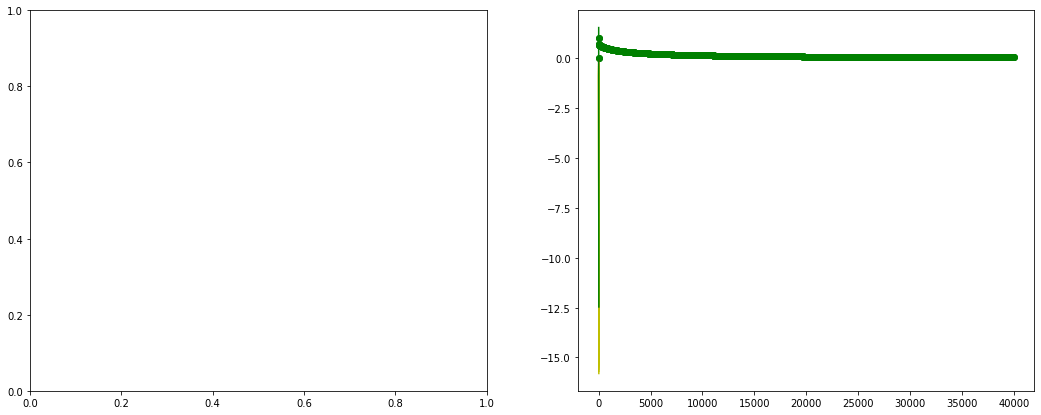

In [39]:
#validate results
X=np.array([[0,0],[0,1],[1,0],[1,1]]).T #the AND opperator, X is 2x4
y=np.array([[0,0,0,1]]) #y is 1x4
m = len(y[0])
alpha = 0.01
num_of_iterations=40000

bias, w = nn(X,y,m,alpha, num_of_iterations)



In [ ]:
print(bias, w[0,0], w[0,1])

fig=plt.figure()
plt.clf()

In [30]:
#validate the results
pred=np.zeros((1,4), dtype=int)
for i in range(4):
    pred[0,i]=int(np.round(sigmoid(np.dot(w,X[:,i])+bias),0))
    print(pred[0,i], end=' ')

0 0 0 1 

In [32]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y[0], pred[0]))

[[3 0]
 [0 1]]
